In [39]:
# Ref : -  https://www.kaggle.com/najeedosmani/96-r2-score-using-linear-regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib notebook

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")

In [205]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**checking the dataset info**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

*It has 22 columns and nearly 3000 entries and with the inequality in no. of observations from each feature it is clear that it has got some null values. Lets try to fix them up and try to solve the problem.
It has 20 Quantitative and 2 Qualitative features.*

*Let us explore and find where the null values are actually present in the Dataset. It is kind of easy to visualize it rather than having it in any other format. Luckily we have heatmaps which uses isnull command to highlight the null values.*

<IPython.core.display.Javascript object>


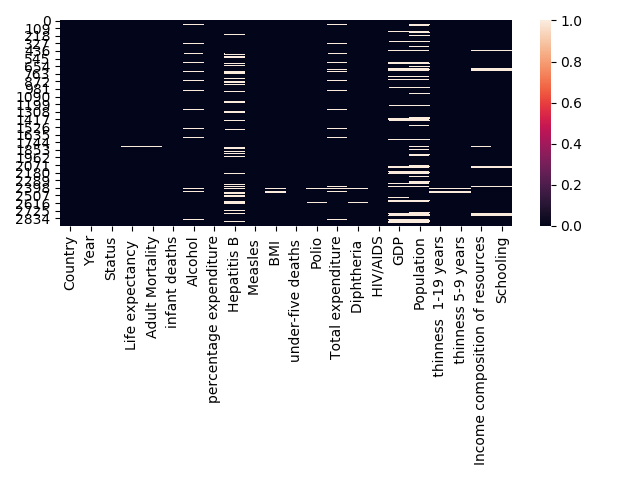

In [26]:
sns.heatmap(pd.isnull(data))
plt.show()
#plt.tight_layout()
plt.tight_layout()

## How do we impute NULL VALUES ?

*In genral we impute null values using the MEAN, MEDIAN Or MODE of that specific feature. Lets see how many null values does each of the features has.*

*Let us write a simple algorithm which prints a dataframe which shows no. of nans from each column.*

In [40]:
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df = pd.DataFrame({'Feature name' :a, 'no. of nan' :b})
null_df

,Feature name,no. of nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


In [52]:
print('Mean:', data['Life expectancy '].mean())
print('Median:', data['Life expectancy '].median())

Mean: 69.22493169398912
Median: 72.1


<IPython.core.display.Javascript object>


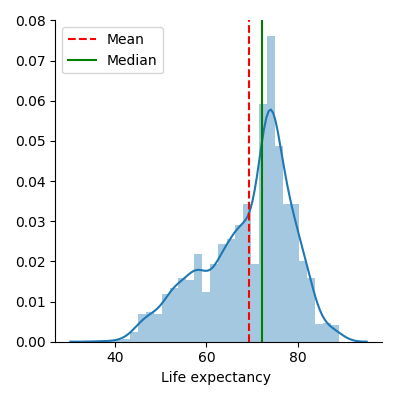

In [84]:
Life_mean = data['Life expectancy '].mean()
Life_median = data['Life expectancy '].median()

sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'Life expectancy ')
plt.axvline(Life_mean, color = 'r', linestyle = '--')
plt.axvline(Life_median, color = 'g', linestyle = '-')
plt.legend({'Mean':Life_mean, 'Median':Life_median})
plt.show()

<IPython.core.display.Javascript object>


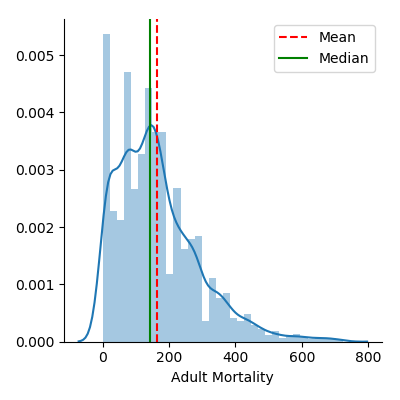

In [96]:
Adult_Mortality_mean = data['Adult Mortality'].mean()
Adult_Mortality_median = data['Adult Mortality'].median()

sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'Adult Mortality')
plt.axvline(Adult_Mortality_mean, color = 'r', linestyle = '--')
plt.axvline(Adult_Mortality_median, color = 'g', linestyle = '-')
plt.legend({'Mean':Adult_Mortality_mean, 'Median':Adult_Mortality_median})
plt.show()

In [86]:
# This piece of code will fill the null values of the selected feature with its mean.
# This one is for filling Nans in 'Life expectancy' column.
data['Life expectancy '] = data['Life expectancy '].fillna(value = data['Life expectancy '].mean())
# This one is for filling Nans in 'Adult Mortality' column.
data['Adult Mortality'] = data['Adult Mortality'].fillna(value = data['Adult Mortality'].mean())

In [88]:
print('After Missing data Imputation - Life expectancy :', data['Life expectancy '].isnull().sum())
print('-------------------------------------------------------------------------')
print('After Missing data Imputation - Adult Mortality :', data['Adult Mortality'].isnull().sum())

After Missing data Imputation - Life expectancy : 0
-------------------------------------------------------------------------
After Missing data Imputation - Adult Mortality : 0


<IPython.core.display.Javascript object>


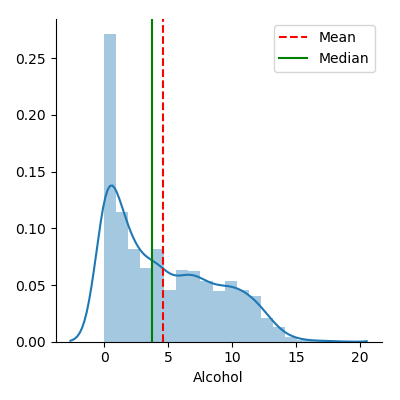

In [93]:
Alcohol_mean = data['Alcohol'].mean()
Alcohol_median = data['Alcohol'].median()

sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'Alcohol')
plt.axvline(Alcohol_mean, color = 'r', linestyle='--')
plt.axvline(Alcohol_median, color = 'g', linestyle='-')
plt.legend({'Mean':Alcohol_mean, 'Median':Alcohol_median})
plt.show()

*Now Lets move on to filling the other columns as well. We will move one by one by filling the Nans of each feature. Our next in target is "ALCOHOL" feature which has almost about 194 Nans.*

*But wait ! We are filling about 200 Nans, Is it ok fill Nans with MEAN this time ? the answer is absolutely Yes. But I thought of doing it in a different way. As it has Nans 20 times larger than the previous one, I thought to fill it using other column which represents best this column.*

*It is always good to fill Nans using bunch of different values as we know that a feature is less likely to have a continous value about 200 or more times and Iam pretty sure that by doing this we would definitely come up with a good result.*

*To do this let us first see the correlation matrix of these features using '.corr' method by pandas.*

In [90]:
corr_data = data.corr()
corr_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<IPython.core.display.Javascript object>


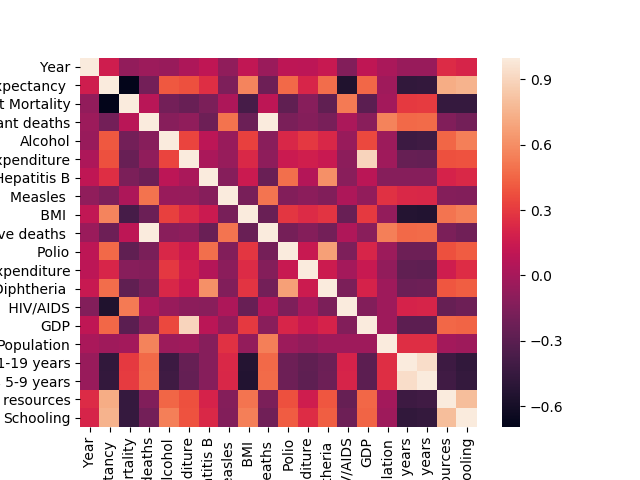

In [97]:
sns.heatmap(corr_data)
plt.show()

<IPython.core.display.Javascript object>


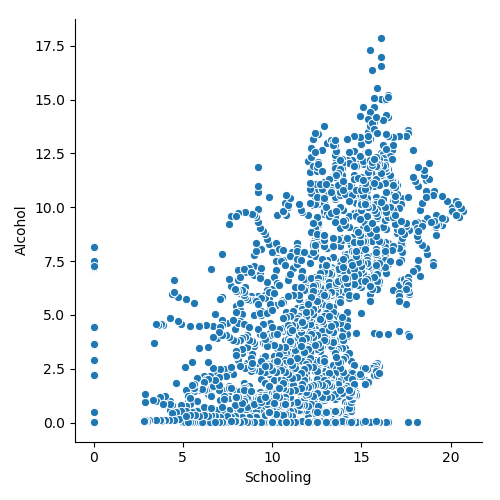

In [114]:
sns.FacetGrid(data, height=5) \
    .map(sns.scatterplot, 'Schooling', 'Alcohol')
plt.show()


In [132]:
def impute_Alcohol(cols):
    al = cols[0]
    sc = cols[1]
    if pd.isnull(al):
        if sc <= 2.5:
            return 4
        elif 2.5 < sc <= 5.0:
            return 1.5
        elif 5.0 < sc <= 7.5:
            return 2.5
        elif 7.5 < sc <=10:
            return 3.0
        elif 10.0 < sc <=15:
            return 4.0
        elif sc > 15:
            return 10.0
    else:
        return al

data['Alcohol'] = data[['Alcohol', 'Schooling']].apply(impute_Alcohol, axis=1)
#print(data[['Alcohol', 'Schooling']].apply(impute_Alcohol, axis=1))

In [133]:
data['Alcohol'].isnull().sum()

9

<IPython.core.display.Javascript object>


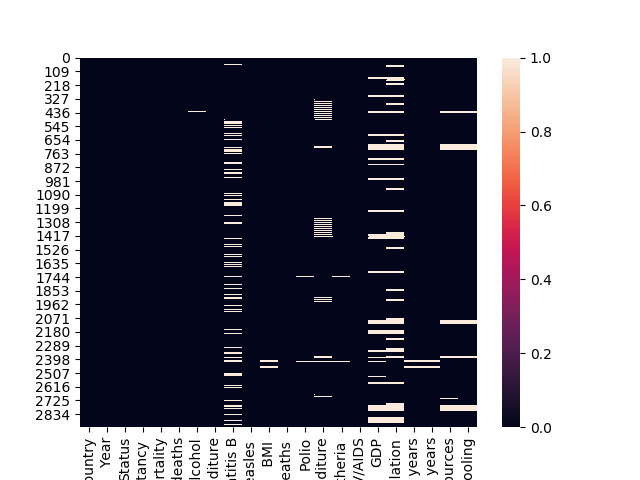

In [135]:
sns.heatmap(pd.isnull(data))
plt.show()
#plt.tight_layout()
#plt.tight_layout()

*Looks like we are still left with some Nans. But why did this exactly happened ?*
*If we could observe from the heatmap the zone in which null values were failed to be filled is the same zone in which the other feature had its Null values. So for now lets fill those remaining Nans with the Mean Value.*

In [137]:
data['Alcohol'] = data['Alcohol'].fillna(value = data['Alcohol'].mean())

In [138]:
#Now we dont have any null values in 'alcohol' column.
data['Alcohol'].isnull().sum()

0

*Lets look at the distribution of the alcohol column.*

<IPython.core.display.Javascript object>


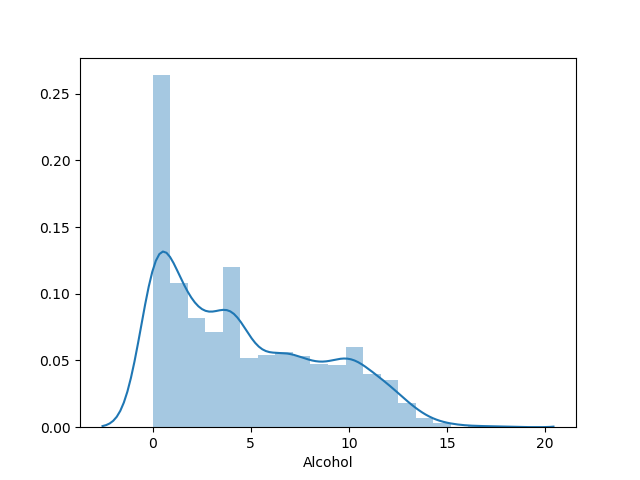

In [140]:
sns.distplot(data['Alcohol'])
plt.show()

*There is a huge positive skew for this distribution. Lets look at its Kurtosis value.*

In [141]:
scipy.stats.skew(data['Alcohol'], axis = 0)

0.5964252568271255

*Lets repeat this for imputing Nans for all other features as well.*

*Important observations:
1. Now our next in list is 'Hepatatis B' which highly correlates with 'Diptheria', But both of them have null values in the same zone.
2. If we want to impute 'Diptheria' first with highly correlated feature 'Polio' then that again would be of no use because it has again the same problem of null values(Nans) in same Zone.*
*But luckily we found an option of imputing 'Polio' feature with the 'Life expactancy' which nicely correlates with it. So for now lets impute 'Polio' feature firstly with 'Life expactancy' and then would impute others using this*

<IPython.core.display.Javascript object>


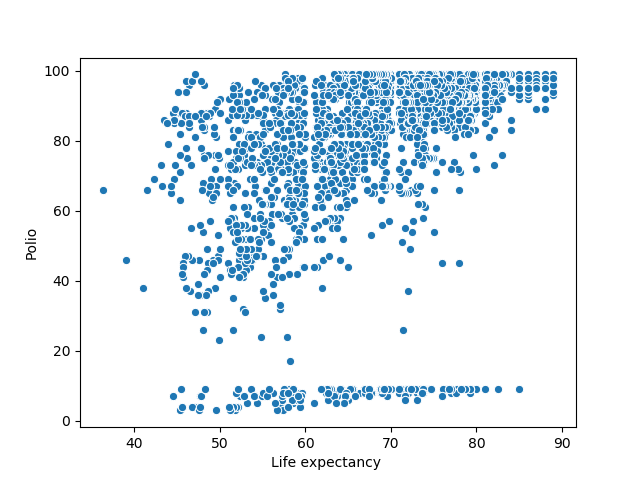

In [146]:
sns.scatterplot(x=data['Life expectancy '], y = data['Polio'])
plt.show()

*Imputing the selected values for each interval. It is the same way like we did for the 'Alcohol' feature.*

In [143]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l < 45:
            return 80.0
        elif 45 < l <= 50:
            return 67.0
        elif 50 < l <= 60:
            return 87.44
        elif 60 < l <= 70:
            return 91
        elif 70 < l <= 80:
            return 94.3
        elif l < 80:
            return 95
    else:
        return p

data['Polio'] = data[['Polio', 'Life expectancy ']].apply(impute_polio, axis = 1)

In [144]:
data['Polio'].isnull().sum()

0

*Now we dont have any nulls in polio section. Lets impute 'Diphtheria' using 'Polio' feature.*

<IPython.core.display.Javascript object>


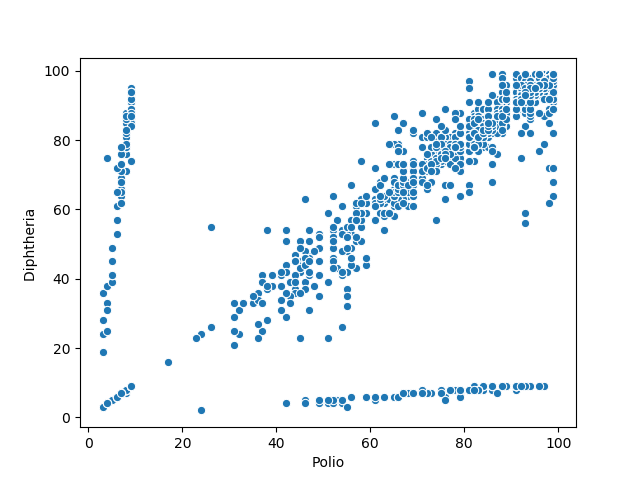

In [147]:
# Scatter plot between these features.

sns.scatterplot(x=data['Polio'],y=data['Diphtheria '])
plt.show()

In [183]:
# Fetching Mean based the groups on the x axis
print('************ Mean ***********************')
print('mean (<= 10): ',np.mean(data['Diphtheria '].loc[data['Polio'] <= 10]))
print('mean (11 - 40): ',np.mean(data['Diphtheria '].loc[(data['Polio'] > 10) & (data['Polio'] <= 40) ] ))
print('mean (41 - 45): ',np.mean(data['Diphtheria '].loc[(data['Polio'] > 40) & (data['Polio'] <= 45) ] ))
print('mean (46 - 50): ',np.mean(data['Diphtheria '].loc[(data['Polio'] > 45) & (data['Polio'] <= 50) ] ))
print('mean (51 - 60): ',np.mean(data['Diphtheria '].loc[(data['Polio'] > 50) & (data['Polio'] <= 60) ] ))
print('mean (61 - 80): ',np.mean(data['Diphtheria '].loc[(data['Polio'] > 60) & (data['Polio'] <= 80) ] ))
print('mean (> 80): ',np.mean(data['Diphtheria '].loc[data['Polio'] > 80] ))
# Fetching median based the groups on the x axis
print('************* Median *********************')
print('median (<= 10): ',data['Diphtheria '].loc[data['Polio'] <= 10].median() )
print('median (11 - 40): ',data['Diphtheria '].loc[(data['Polio'] > 10) & (data['Polio'] <= 40) ].median() )
print('median (41 - 45): ',data['Diphtheria '].loc[(data['Polio'] > 40) & (data['Polio'] <= 45) ].median() )
print('median (46 - 50): ',data['Diphtheria '].loc[(data['Polio'] > 45) & (data['Polio'] <= 50) ].median() )
print('median (51 - 60): ',data['Diphtheria '].loc[(data['Polio'] > 50) & (data['Polio'] <= 60) ].median() )
print('median (61 - 80): ',data['Diphtheria '].loc[(data['Polio'] > 60) & (data['Polio'] <= 80) ].median() )
print('median (> 80): ',data['Diphtheria '].loc[data['Polio'] > 80].median() )

************ Mean ***********************
mean (<= 10):  48.97093023255814
mean (11 - 40):  31.0
mean (41 - 45):  39.75675675675676
mean (46 - 50):  41.5
mean (51 - 60):  46.188235294117646
mean (61 - 80):  67.07582938388626
mean (> 80):  91.69620253164557
************* Median *********************
median (<= 10):  64.5
median (11 - 40):  32.0
median (41 - 45):  41.0
median (46 - 50):  45.0
median (51 - 60):  52.0
median (61 - 80):  73.0
median (> 80):  95.0


In [180]:
# Fetching median based the groups on the x axis
#print('median (61 - 80): ',np.median(data['Diphtheria '].loc[(data['Polio'] > 60) & (data['Polio'] <= 80) ] )) 
#temp_data = data['Diphtheria '].loc[(data['Polio'] > 60) & (data['Polio'] <= 80) ] 
data['Diphtheria '].loc[(data['Polio'] > 60) & (data['Polio'] <= 80) ].median()

73.0

In [184]:
def impute_Diphtheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d

data['Diphtheria '] = data[['Diphtheria ', 'Polio']].apply(impute_Diphtheria, axis=1)

In [185]:
data['Diphtheria '].isnull().sum()

0

*Now its time for imputing 'Hepatitis B' using 'Diptheria' feature.*

<IPython.core.display.Javascript object>


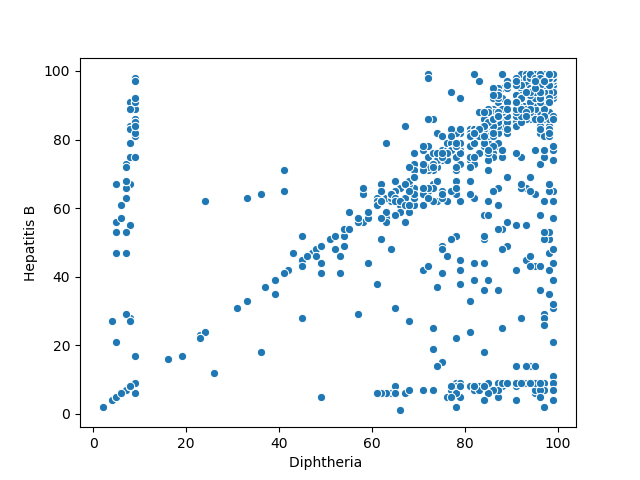

In [207]:
# Scatterplot between them.
sns.scatterplot(x=data['Diphtheria '], y=data['Hepatitis B'])
plt.show()

In [187]:
# Fetching Mean based the groups on the x axis
print('************ Mean ***********************')
print('mean (<= 15): ',data['Hepatitis B'].loc[data['Diphtheria '] <= 15].mean())
print('mean (15+ - 30): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 15) & (data['Diphtheria '] <= 30)].mean())
print('mean (30+ - 45): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 30) & (data['Diphtheria '] <= 45)].mean())
print('mean (45+ - 60): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 45) & (data['Diphtheria '] <= 60)].mean())
print('mean (60+ - 80): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 60) & (data['Diphtheria '] <= 80)].mean())
print('mean (> 80): ',data['Hepatitis B'].loc[data['Diphtheria '] > 80].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('median (<= 15): ',data['Hepatitis B'].loc[data['Diphtheria '] <= 15].median())
print('median (15+ - 30): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 15) & (data['Diphtheria '] <= 30)].median())
print('median (30+ - 45): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 30) & (data['Diphtheria '] <= 45)].median())
print('median (45+ - 60): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 45) & (data['Diphtheria '] <= 60)].median())
print('median (60+ - 80): ',data['Hepatitis B'].loc[(data['Diphtheria '] > 60) & (data['Diphtheria '] <= 80)].median())
print('median (> 80): ',data['Hepatitis B'].loc[data['Diphtheria '] > 80].median())

************ Mean ***********************
mean (<= 15):  36.557377049180324
mean (15+ - 30):  24.75
mean (30+ - 45):  43.666666666666664
mean (45+ - 60):  49.361111111111114
mean (60+ - 80):  63.63742690058479
mean (> 80):  88.39503507825148
************ median ***********************
median (<= 15):  9.0
median (15+ - 30):  22.0
median (30+ - 45):  42.0
median (45+ - 60):  49.0
median (60+ - 80):  71.0
median (> 80):  94.0


<IPython.core.display.Javascript object>


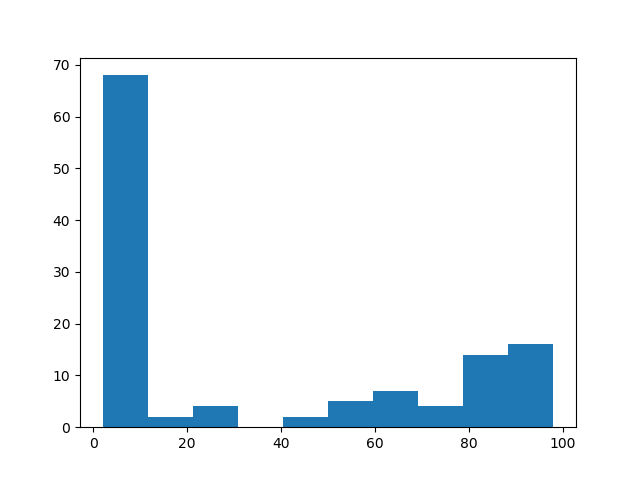

In [208]:
plt.hist(data['Hepatitis B'].loc[(data['Diphtheria '] <= 15)])
plt.show()
#data['Hepatitis B'].loc[(data['Diphtheria '] <= 15)]

In [209]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
data['Hepatitis B']=data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [210]:
data['Hepatitis B'].isnull().sum()

0

*Here is the list of features that we are going to impute with other features:*

*Impute 'BMI' feature with 'Life expactancy' feature.*

*Impute 'Total expenditure' with 'Alcohol' feature.*

*Impute 'GDP' feature with 'percentage expenditure ' feature.*

*Impute 'Population' feature with 'Infant death' feature.*

*Impute 'Thin 1-19' feature with 'BMI' feature.*

*Impute 'Thin 5-9' feature with 'BMI' feature.*

*Impute 'Schooling' feature and 'Income Composition of resources' feature with 'Life expactancy' feature.*

*Lets begin the process of imputing.*

<IPython.core.display.Javascript object>


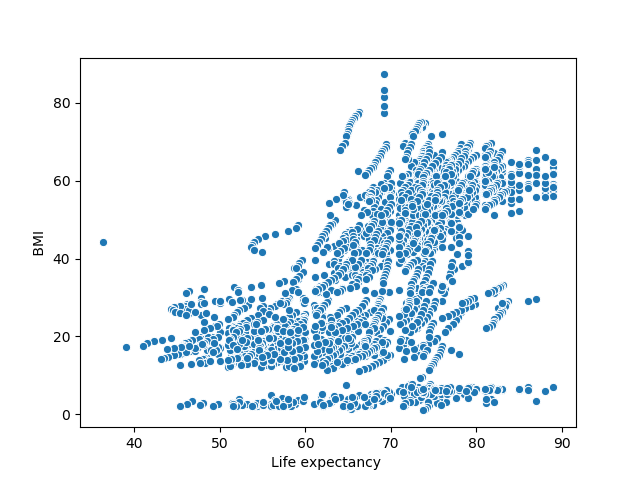

In [215]:
sns.scatterplot(x=data['Life expectancy '], y=data[' BMI '])
plt.show()

In [216]:
# Fetching Mean based the groups on the x axis
print('************ Mean ***********************')
print('mean (<= 50): ',data[' BMI '].loc[data['Life expectancy '] <= 50].mean())
print('mean (50+ - 60): ',data[' BMI '].loc[(data['Life expectancy '] > 50) & (data['Life expectancy '] <= 60)].mean())
print('mean (60+ - 70): ',data[' BMI '].loc[(data['Life expectancy '] > 60) & (data['Life expectancy '] <= 70)].mean())
print('mean (70+ - 80): ',data[' BMI '].loc[(data['Life expectancy '] > 70) & (data['Life expectancy '] <= 80)].mean())
print('mean (80+ - 100): ',data[' BMI '].loc[(data['Life expectancy '] > 80) & (data['Life expectancy '] <= 100)].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('median (<= 50): ',data[' BMI '].loc[data['Life expectancy '] <= 50].median())
print('median (50+ - 60): ',data[' BMI '].loc[(data['Life expectancy '] > 50) & (data['Life expectancy '] <= 60)].median())
print('median (60+ - 70): ',data[' BMI '].loc[(data['Life expectancy '] > 60) & (data['Life expectancy '] <= 70)].median())
print('median (70+ - 80): ',data[' BMI '].loc[(data['Life expectancy '] > 70) & (data['Life expectancy '] <= 80)].median())
print('median (80+ - 100): ',data[' BMI '].loc[(data['Life expectancy '] > 80) & (data['Life expectancy '] <= 100)].median())

************ Mean ***********************
mean (<= 50):  19.362400000000004
mean (50+ - 60):  19.12589285714285
mean (60+ - 70):  32.97172995780591
mean (70+ - 80):  46.81967812728601
mean (80+ - 100):  50.79367588932805
************ median ***********************
median (<= 50):  18.2
median (50+ - 60):  18.8
median (60+ - 70):  32.5
median (70+ - 80):  53.5
median (80+ - 100):  59.0


In [217]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data[' BMI ']=data[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

In [218]:
data[' BMI '].isnull().sum()

0

<IPython.core.display.Javascript object>


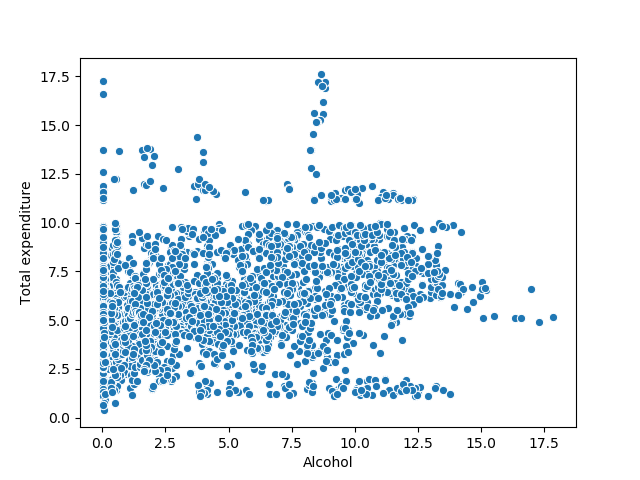

In [219]:
sns.scatterplot(x=data['Alcohol'], y=data['Total expenditure'])
plt.show()

In [221]:
# Fetching Mean based the groups on the x axis
print('************ Mean ***********************')
print('overall mean: ', data['Total expenditure'].mean())
print('mean (<= 2.5): ',data['Total expenditure'].loc[data['Alcohol'] <= 2.5].mean())
print('mean (2.5+ to 5.0): ',data['Total expenditure'].loc[(data['Alcohol'] > 2.5) & (data['Alcohol'] <= 5.0)].mean())
print('mean (5.0+ to 10.0): ',data['Total expenditure'].loc[(data['Alcohol'] > 5.0) & (data['Alcohol'] <= 10.0)].mean())
print('mean (10.0+ to 12.5): ',data['Total expenditure'].loc[(data['Alcohol'] > 10.0) & (data['Alcohol'] <= 12.5)].mean())
print('mean (> 12.0): ',data['Total expenditure'].loc[data['Alcohol'] > 12.5].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('overall median: ', data['Total expenditure'].median())
print('median (<= 2.5): ',data['Total expenditure'].loc[data['Alcohol'] <= 2.5].median())
print('median (2.5+ to 5.0): ',data['Total expenditure'].loc[(data['Alcohol'] > 2.5) & (data['Alcohol'] <= 5.0)].median())
print('median (5.0+ to 10.0): ',data['Total expenditure'].loc[(data['Alcohol'] > 5.0) & (data['Alcohol'] <= 10.0)].median())
print('median (10.0+ to 12.5): ',data['Total expenditure'].loc[(data['Alcohol'] > 10.0) & (data['Alcohol'] <= 12.5)].median())
print('median (> 12.0): ',data['Total expenditure'].loc[data['Alcohol'] > 12.5].median())

************ Mean ***********************
overall mean:  5.9381895280235915
mean (<= 2.5):  5.08741302408563
mean (2.5+ to 5.0):  6.025063025210081
mean (5.0+ to 10.0):  6.710765100671133
mean (10.0+ to 12.5):  6.899100346020762
mean (> 12.0):  6.667777777777778
************ median ***********************
overall median:  5.755
median (<= 2.5):  4.8
median (2.5+ to 5.0):  5.779999999999999
median (5.0+ to 10.0):  6.53
median (10.0+ to 12.5):  7.41
median (> 12.0):  6.81


<IPython.core.display.Javascript object>


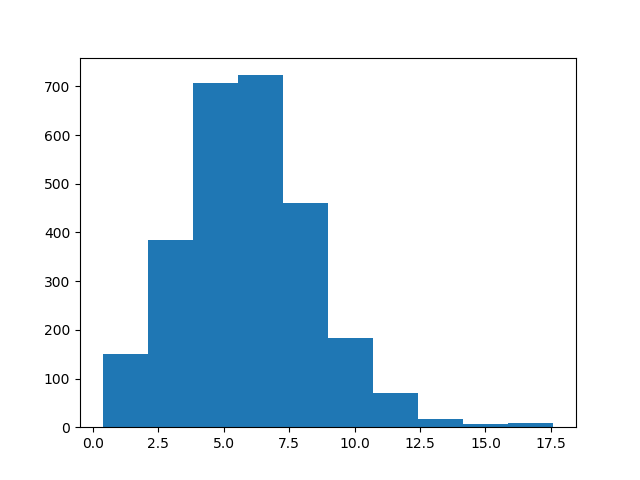

In [224]:
plt.hist(data['Total expenditure'])
plt.show()

In [225]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total expenditure']=data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

In [226]:
data['Total expenditure'].isnull().sum()

0

<IPython.core.display.Javascript object>


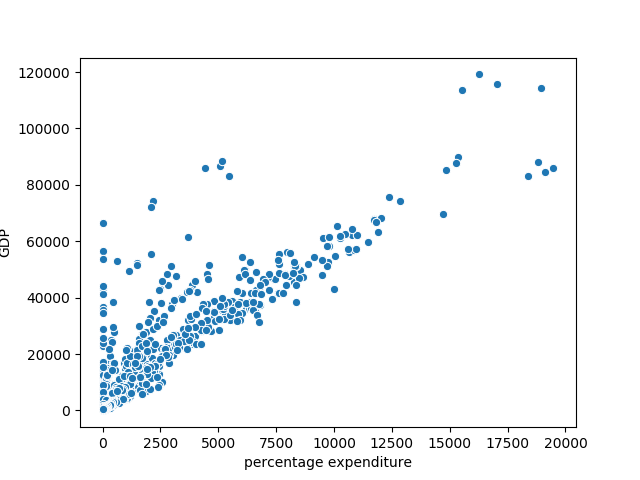

In [227]:
sns.scatterplot(x=data['percentage expenditure'],y=data['GDP'])

<IPython.core.display.Javascript object>


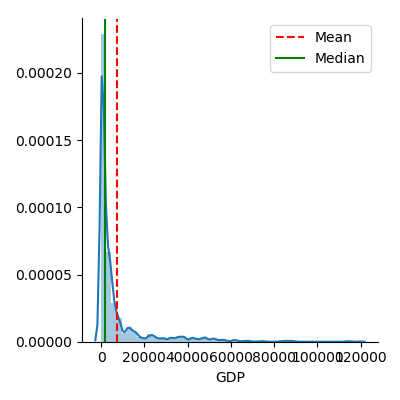

In [232]:
#Life_mean = data['Life expectancy '].mean()
#Life_median = data['Life expectancy '].median()

sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'GDP')
plt.axvline(data['GDP'].mean(), color = 'r', linestyle = '--')
plt.axvline(data['GDP'].median(), color = 'g', linestyle = '-')
plt.legend({'Mean':data['GDP'].mean(), 'Median':data['GDP'].median()})
plt.show()

#plt.hist(data['percentage expenditure'])
#plt.show()

In [233]:
# Fetching Mean based the groups on the x axis
print('************ Mean ***********************')
print('overall mean: ', data['GDP'].mean())
print('mean (<= 1250): ',data['GDP'].loc[data['percentage expenditure'] <= 1250].mean())
print('mean (1250+ to 2500): ',data['GDP'].loc[(data['percentage expenditure'] > 1250) & (data['percentage expenditure'] <= 2500)].mean())
print('mean (2500+ to 3750): ',data['GDP'].loc[(data['percentage expenditure'] > 2500) & (data['percentage expenditure'] <= 3750)].mean())
print('mean (3750+ to 7500): ',data['GDP'].loc[(data['percentage expenditure'] > 3750) & (data['percentage expenditure'] <= 7500)].mean())
print('mean (7500+ to 8750): ',data['GDP'].loc[(data['percentage expenditure'] > 7500) & (data['percentage expenditure'] <= 8750)].mean())
print('mean (8750+ to 10000): ',data['GDP'].loc[(data['percentage expenditure'] > 8750) & (data['percentage expenditure'] <= 10000)].mean())
print('mean (10000+ to 11250): ',data['GDP'].loc[(data['percentage expenditure'] > 10000) & (data['percentage expenditure'] <= 11250)].mean())
print('mean (11250+ to 12500): ',data['GDP'].loc[(data['percentage expenditure'] > 11250) & (data['percentage expenditure'] <= 12500)].mean())
print('mean (12500+ to 15000): ',data['GDP'].loc[(data['percentage expenditure'] > 12500) & (data['percentage expenditure'] <= 15000)].mean())
print('mean (15000+ to 17500): ',data['GDP'].loc[(data['percentage expenditure'] > 15000) & (data['percentage expenditure'] <= 17500)].mean())
print('mean (> 17500): ',data['GDP'].loc[data['percentage expenditure'] > 17500].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('overall median: ', data['GDP'].median())
print('median (<= 1250): ',data['GDP'].loc[data['percentage expenditure'] <= 1250].median())
print('median (1250+ to 2500): ',data['GDP'].loc[(data['percentage expenditure'] > 1250) & (data['percentage expenditure'] <= 2500)].median())
print('median (2500+ to 3750): ',data['GDP'].loc[(data['percentage expenditure'] > 2500) & (data['percentage expenditure'] <= 3750)].median())
print('median (3750+ to 7500): ',data['GDP'].loc[(data['percentage expenditure'] > 3750) & (data['percentage expenditure'] <= 7500)].median())
print('median (7500+ to 8750): ',data['GDP'].loc[(data['percentage expenditure'] > 7500) & (data['percentage expenditure'] <= 8750)].median())
print('median (8750+ to 10000): ',data['GDP'].loc[(data['percentage expenditure'] > 8750) & (data['percentage expenditure'] <= 10000)].median())
print('median (10000+ to 11250): ',data['GDP'].loc[(data['percentage expenditure'] > 10000) & (data['percentage expenditure'] <= 11250)].median())
print('median (11250+ to 12500): ',data['GDP'].loc[(data['percentage expenditure'] > 11250) & (data['percentage expenditure'] <= 12500)].median())
print('median (12500+ to 15000): ',data['GDP'].loc[(data['percentage expenditure'] > 12500) & (data['percentage expenditure'] <= 15000)].median())
print('median (15000+ to 17500): ',data['GDP'].loc[(data['percentage expenditure'] > 15000) & (data['percentage expenditure'] <= 17500)].median())
print('median (> 17500): ',data['GDP'].loc[data['percentage expenditure'] > 17500].median())

************ Mean ***********************
overall mean:  7483.158469138481
mean (<= 1250):  2937.5602309464625
mean (1250+ to 2500):  18457.317701105694
mean (2500+ to 3750):  28719.604417377068
mean (3750+ to 7500):  39217.118505825245
mean (7500+ to 8750):  48372.835215384606
mean (8750+ to 10000):  54822.896244545445
mean (10000+ to 11250):  58842.19107307692
mean (11250+ to 12500):  67018.11323285714
mean (12500+ to 15000):  76305.27524666667
mean (15000+ to 17500):  105214.526792
mean (> 17500):  91186.030436
************ median ***********************
overall median:  1766.947595
median (<= 1250):  1259.87591
median (1250+ to 2500):  14965.361
median (2500+ to 3750):  24913.24452
median (3750+ to 7500):  36967.28292
median (7500+ to 8750):  48256.500615
median (8750+ to 10000):  53255.976310000005
median (10000+ to 11250):  61191.19263
median (11250+ to 12500):  67677.63477
median (12500+ to 15000):  74114.69715
median (15000+ to 17500):  113751.85
median (> 17500):  85814.58857


In [234]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1260.0
        elif 1250<p<=2500:
            return 14965.0
        elif 2500<p<=3750:
            return 24913.0
        elif 3750<p<=7500:
            return 36967.0
        elif 7500<p<=8750:
            return 48256.0
        elif 8750<p<=10000:
            return 53255.0
        elif 10000<p<=11250:
            return 61191.0
        elif 11250<p<=12500:
            return 67677.0
        elif 12500<p<=15000:
            return 74114.0
        elif 15000<p<=17500:
            return 113751.0
        elif p>17500:
            return 85814.0
    else:
        return g

data['GDP'] = data[['GDP','percentage expenditure']].apply(impute_GDP, axis=1)

In [235]:
data['GDP'].isnull().sum()

0

<IPython.core.display.Javascript object>


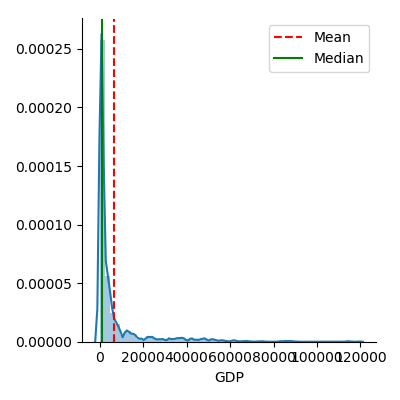

In [236]:
sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'GDP')
plt.axvline(data['GDP'].mean(), color = 'r', linestyle = '--')
plt.axvline(data['GDP'].median(), color = 'g', linestyle = '-')
plt.legend({'Mean':data['GDP'].mean(), 'Median':data['GDP'].median()})
plt.show()

<IPython.core.display.Javascript object>


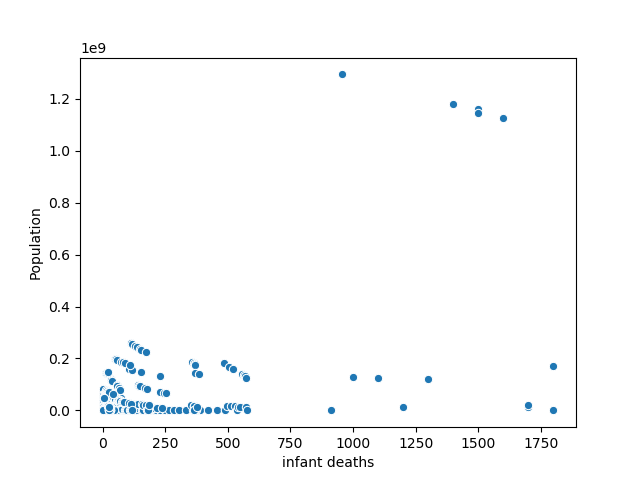

In [237]:
# Scatter between infant deaths and Population
sns.scatterplot(x=data['infant deaths'],y=data['Population'])
plt.show()

<IPython.core.display.Javascript object>


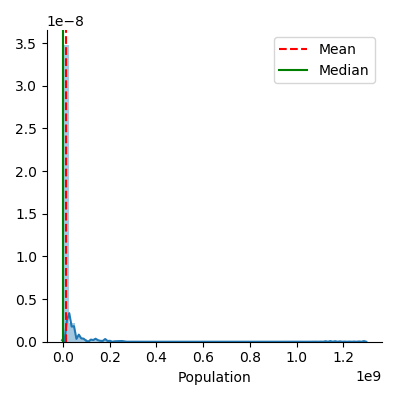

In [238]:
sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'Population')
plt.axvline(data['Population'].mean(), color = 'r', linestyle = '--')
plt.axvline(data['Population'].median(), color = 'g', linestyle = '-')
plt.legend({'Mean':data['Population'].mean(), 'Median':data['Population'].median()})
plt.show()

In [244]:
# Fetching Mean based the groups on the x axis
print('************ Mean ***********************')
print('overall mean: ', data['Population'].mean())
print('mean (<= 100): ',data['Population'].loc[data['infant deaths'] <= 100].mean())
print('mean (100+ to 250): ',data['Population'].loc[(data['infant deaths'] > 100) & (data['infant deaths'] <= 250)].mean())
print('mean (250+ to 350): ',data['Population'].loc[(data['infant deaths'] > 250) & (data['infant deaths'] <= 350)].mean())
print('mean (350+ to 900): ',data['Population'].loc[(data['infant deaths'] > 350) & (data['infant deaths'] <= 900)].mean())
print('mean (900+ to 1100): ',data['Population'].loc[(data['infant deaths'] > 900) & (data['infant deaths'] <= 1100)].mean())
print('mean (1100+ to 1250): ',data['Population'].loc[(data['infant deaths'] > 1100) & (data['infant deaths'] <= 1250)].mean())
print('mean (1250+ to 1500): ',data['Population'].loc[(data['infant deaths'] > 1250) & (data['infant deaths'] <= 1500)].mean())
print('mean (1500+ to 1750): ',data['Population'].loc[(data['infant deaths'] > 1500) & (data['infant deaths'] <= 1750)].mean())
print('mean (> 1750): ',data['Population'].loc[data['infant deaths'] > 1750].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('overall median: ', data['Population'].median())
print('median (<= 100): ',data['Population'].loc[data['infant deaths'] <= 100].median())
print('median (100+ to 250): ',data['Population'].loc[(data['infant deaths'] > 100) & (data['infant deaths'] <= 250)].median())
print('median (250+ to 350): ',data['Population'].loc[(data['infant deaths'] > 250) & (data['infant deaths'] <= 350)].median())
print('median (350+ to 900): ',data['Population'].loc[(data['infant deaths'] > 350) & (data['infant deaths'] <= 900)].median())
print('median (900+ to 1100): ',data['Population'].loc[(data['infant deaths'] > 900) & (data['infant deaths'] <= 1100)].median())
print('median (1100+ to 1250): ',data['Population'].loc[(data['infant deaths'] > 1100) & (data['infant deaths'] <= 1250)].median())
print('median (1250+ to 1500): ',data['Population'].loc[(data['infant deaths'] > 1250) & (data['infant deaths'] <= 1500)].median())
print('median (1500+ to 1750): ',data['Population'].loc[(data['infant deaths'] > 1500) & (data['infant deaths'] <= 1750)].median())
print('median (> 1750): ',data['Population'].loc[data['infant deaths'] > 1750].median())

************ Mean ***********************
overall mean:  12753375.120052498
mean (<= 100):  7695546.875260488
mean (100+ to 250):  57794437.81355932
mean (250+ to 350):  13841271.0
mean (350+ to 900):  60540894.89189189
mean (900+ to 1100):  334840080.0
mean (1100+ to 1250):  12398691.0
mean (1250+ to 1500):  745383892.0
mean (1500+ to 1750):  385650245.6666667
mean (> 1750):  86506883.5
************ median ***********************
overall median:  1386542.0
median (<= 100):  1289898.0
median (100+ to 250):  15214912.0
median (250+ to 350):  1317885.0
median (350+ to 900):  15793993.0
median (900+ to 1100):  126365852.0
median (1100+ to 1250):  12398691.0
median (1250+ to 1500):  1144118674.0
median (1500+ to 1750):  18987112.0
median (> 1750):  86506883.5


In [246]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 1289898.0
        elif 100<i<=250:
            return 15214912.0
        elif 250<i<=350:
            return 1317885.0
        elif 350<i<=900:
            return 15793993.0
        elif 900<i<=1100:
            return 126365852.0
        elif 1100<i<=1250:
            return 12398691.0
        elif 1250<i<=1500:
            return 1144118674.0
        elif 1500<i<=1750:
            return 18987112.0
        elif i>1750:
            return 86506883.5
    else:
        return p
    
data['Population']=data[['Population','infant deaths']].apply(impute_population,axis=1)

In [252]:
data['Population'].isnull().sum()

0

<IPython.core.display.Javascript object>


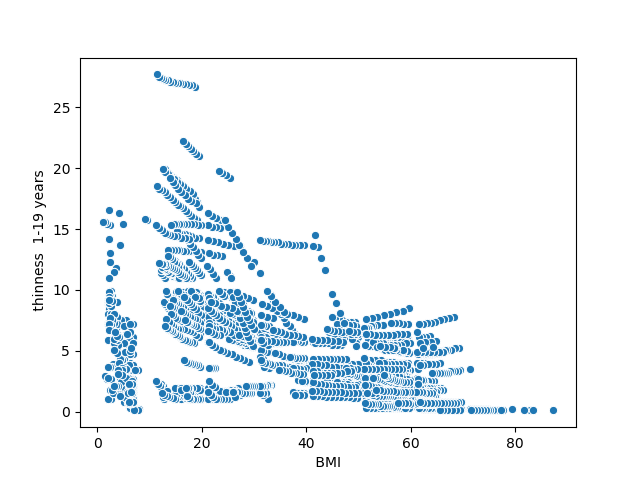

In [253]:
#Scatterplot between thinness  1-19 years and BMI
sns.scatterplot(x=data[' BMI '],y=data[' thinness  1-19 years'])
plt.show()

<IPython.core.display.Javascript object>


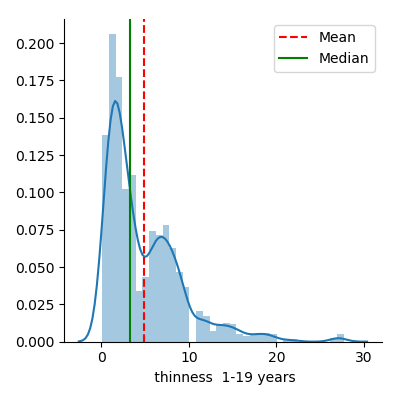

In [254]:
sns.FacetGrid(data, height=4) \
    .map(sns.distplot, ' thinness  1-19 years')
plt.axvline(data[' thinness  1-19 years'].mean(), color = 'r', linestyle = '--')
plt.axvline(data[' thinness  1-19 years'].median(), color = 'g', linestyle = '-')
plt.legend({'Mean':data[' thinness  1-19 years'].mean(), 'Median':data[' thinness  1-19 years'].median()})
plt.show()

In [255]:
# Fetching Mean based the groups on the x axis
print('************ Mean ***********************')
print('overall mean: ', data[' thinness  1-19 years'].mean())
print('mean (<= 10): ',data[' thinness  1-19 years'].loc[data[' BMI '] <= 10].mean())
print('mean (10+ - 20): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 10) & (data[' BMI '] <= 20)].mean())
print('mean (20+ - 30): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 20) & (data[' BMI '] <= 30)].mean())
print('mean (30+ - 40): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 30) & (data[' BMI '] <= 40)].mean())
print('mean (40+ - 50): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 40) & (data[' BMI '] <= 50)].mean())
print('mean (50+ - 70): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 50) & (data[' BMI '] <= 70)].mean())
print('mean (> 70): ',data[' thinness  1-19 years'].loc[data[' BMI '] > 70].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('overall median: ', data[' thinness  1-19 years'].median())
print('median (<= 10): ',data[' thinness  1-19 years'].loc[data[' BMI '] <= 10].median())
print('median (10+ - 20): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 10) & (data[' BMI '] <= 20)].median())
print('median (20+ - 30): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 20) & (data[' BMI '] <= 30)].median())
print('median (30+ - 40): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 30) & (data[' BMI '] <= 40)].median())
print('median (40+ - 50): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 40) & (data[' BMI '] <= 50)].median())
print('median (50+ - 70): ',data[' thinness  1-19 years'].loc[(data[' BMI '] > 50) & (data[' BMI '] <= 70)].median())
print('median (> 70): ',data[' thinness  1-19 years'].loc[data[' BMI '] > 70].median())

************ Mean ***********************
overall mean:  4.8397038567493205
mean (<= 10):  4.569964664310953
mean (10+ - 20):  10.049180327868845
mean (20+ - 30):  7.108641975308639
mean (30+ - 40):  5.617000000000003
mean (40+ - 50):  3.3408740359897147
mean (50+ - 70):  2.306974637681159
mean (> 70):  0.23714285714285707
************ median ***********************
overall median:  3.3
median (<= 10):  3.4
median (10+ - 20):  9.3
median (20+ - 30):  7.3
median (30+ - 40):  5.6
median (40+ - 50):  3.0
median (50+ - 70):  1.8
median (> 70):  0.1


In [256]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 3.4
        elif 10<b<=20:
            return 9.3
        elif 20<b<=30:
            return 7.3
        elif 30<b<=40:
            return 5.6
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 1.8
        elif b>70:
            return 0.1
    else:
        return t
    
data[' thinness  1-19 years']=data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [257]:
data[' thinness  1-19 years'].isnull().sum()

0

<IPython.core.display.Javascript object>


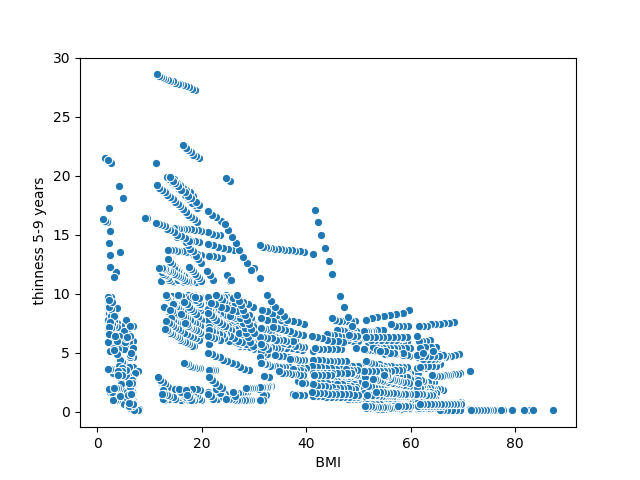

In [261]:
#Scatterplot between thinness  1-19 years and BMI
sns.scatterplot(x=data[' BMI '],y=data[' thinness 5-9 years'])
plt.show()

<IPython.core.display.Javascript object>


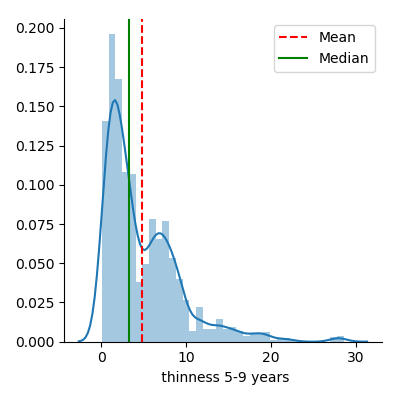

In [262]:
sns.FacetGrid(data, height=4) \
    .map(sns.distplot, ' thinness 5-9 years')
plt.axvline(data[' thinness 5-9 years'].mean(), color = 'r', linestyle = '--')
plt.axvline(data[' thinness 5-9 years'].median(), color = 'g', linestyle = '-')
plt.legend({'Mean':data[' thinness 5-9 years'].mean(), 'Median':data[' thinness 5-9 years'].median()})
plt.show()

In [263]:
# Fetching mean based the groups on the x axis
print('************ mean ***********************')
print('overall mean: ', data[' thinness 5-9 years'].mean())
print('mean (<= 10): ',data[' thinness 5-9 years'].loc[data[' BMI '] <= 10].mean())
print('mean (10+ - 20): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 10) & (data[' BMI '] <= 20)].mean())
print('mean (20+ - 30): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 20) & (data[' BMI '] <= 30)].mean())
print('mean (30+ - 40): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 30) & (data[' BMI '] <= 40)].mean())
print('mean (40+ - 50): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 40) & (data[' BMI '] <= 50)].mean())
print('mean (50+ - 70): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 50) & (data[' BMI '] <= 70)].mean())
print('mean (> 70): ',data[' thinness 5-9 years'].loc[data[' BMI '] > 70].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('overall median: ', data[' thinness 5-9 years'].median())
print('median (<= 10): ',data[' thinness 5-9 years'].loc[data[' BMI '] <= 10].median())
print('median (10+ - 20): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 10) & (data[' BMI '] <= 20)].median())
print('median (20+ - 30): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 20) & (data[' BMI '] <= 30)].median())
print('median (30+ - 40): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 30) & (data[' BMI '] <= 40)].median())
print('median (40+ - 50): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 40) & (data[' BMI '] <= 50)].median())
print('median (50+ - 70): ',data[' thinness 5-9 years'].loc[(data[' BMI '] > 50) & (data[' BMI '] <= 70)].median())
print('median (> 70): ',data[' thinness 5-9 years'].loc[data[' BMI '] > 70].median())

************ mean ***********************
overall mean:  4.870316804407711
mean (<= 10):  4.875618374558303
mean (10+ - 20):  10.076639344262292
mean (20+ - 30):  7.163950617283943
mean (30+ - 40):  5.610500000000002
mean (40+ - 50):  3.3750642673521796
mean (50+ - 70):  2.266757246376818
mean (> 70):  0.20857142857142838
************ median ***********************
overall median:  3.3
median (<= 10):  3.5
median (10+ - 20):  9.2
median (20+ - 30):  7.3
median (30+ - 40):  5.4
median (40+ - 50):  3.0
median (50+ - 70):  1.9
median (> 70):  0.1


In [264]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 3.5
        elif 10<b<=20:
            return 9.2
        elif 20<b<=30:
            return 7.3
        elif 30<b<=40:
            return 5.4
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 1.9
        elif b>70:
            return 0.1
    else:
        return t
    
data[' thinness 5-9 years']=data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [265]:
data[' thinness 5-9 years'].isnull().sum()

0

<IPython.core.display.Javascript object>


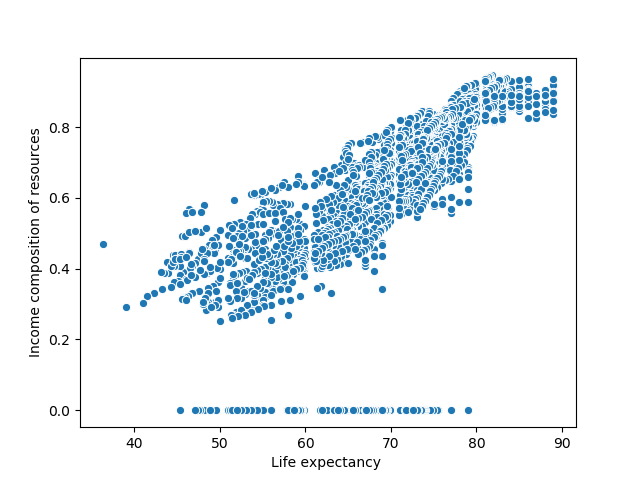

In [266]:
#Scatterplot
sns.scatterplot(x=data['Life expectancy '],y=data['Income composition of resources'])
plt.show()

<IPython.core.display.Javascript object>


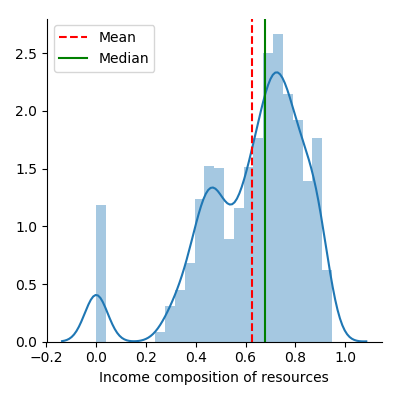

In [267]:
sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'Income composition of resources')
plt.axvline(data['Income composition of resources'].mean(), color = 'r', linestyle = '--')
plt.axvline(data['Income composition of resources'].median(), color = 'g', linestyle = '-')
plt.legend({'Mean':data['Income composition of resources'].mean(), 'Median':data['Income composition of resources'].median()})
plt.show()

In [268]:
# Fetching mean based the groups on the x axis
print('************ mean ***********************')
print('overall mean: ', data['Income composition of resources'].mean())
print('mean (<= 40): ',data['Income composition of resources'].loc[data['Life expectancy '] <= 40].mean())
print('mean (40+ - 50): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 40) & (data['Life expectancy '] <= 50)].mean())
print('mean (50+ - 60): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 50) & (data['Life expectancy '] <= 60)].mean())
print('mean (60+ - 70): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 60) & (data['Life expectancy '] <= 70)].mean())
print('mean (70+ - 80): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 70) & (data['Life expectancy '] <= 80)].mean())
print('mean (> 80): ',data['Income composition of resources'].loc[data['Life expectancy '] > 80].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('overall median: ', data['Income composition of resources'].median())
print('median (<= 40): ',data['Income composition of resources'].loc[data['Life expectancy '] <= 40].median())
print('median (40+ - 50): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 40) & (data['Life expectancy '] <= 50)].median())
print('median (50+ - 60): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 50) & (data['Life expectancy '] <= 60)].median())
print('median (60+ - 70): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 60) & (data['Life expectancy '] <= 70)].median())
print('median (70+ - 80): ',data['Income composition of resources'].loc[(data['Life expectancy '] > 70) & (data['Life expectancy '] <= 80)].median())
print('median (> 80): ',data['Income composition of resources'].loc[data['Life expectancy '] > 80].median())

************ mean ***********************
overall mean:  0.6275510645976166
mean (<= 40):  0.381
mean (40+ - 50):  0.3712434782608695
mean (50+ - 60):  0.40212048192771105
mean (60+ - 70):  0.5412112879884231
mean (70+ - 80):  0.7198969465648863
mean (> 80):  0.8889369747899157
************ median ***********************
overall median:  0.677
median (<= 40):  0.381
median (40+ - 50):  0.391
median (50+ - 60):  0.423
median (60+ - 70):  0.565
median (70+ - 80):  0.741
median (> 80):  0.89


In [269]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.381
        elif 40<l<=50:
            return 0.391
        elif 50<l<=60:
            return 0.423
        elif 60<l<=70:
            return 0.565
        elif 70<l<=80:
            return 0.741
        elif l>80:
            return 0.89
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

In [274]:
data['Income composition of resources'].isnull().sum()

0

<IPython.core.display.Javascript object>


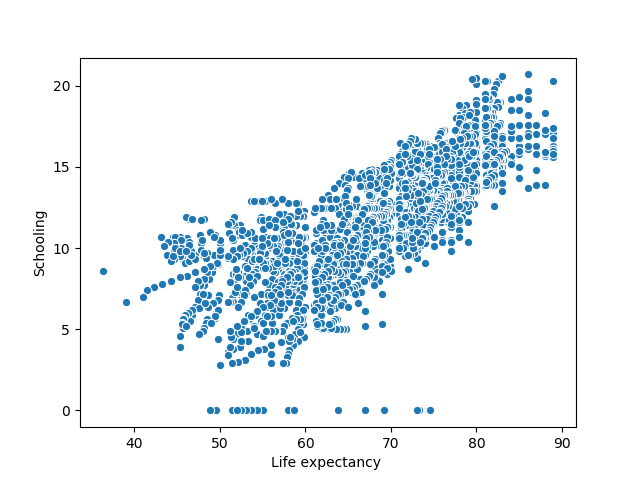

In [275]:
#Scatterplot
sns.scatterplot(x=data['Life expectancy '],y=data['Schooling'])
plt.show()

<IPython.core.display.Javascript object>


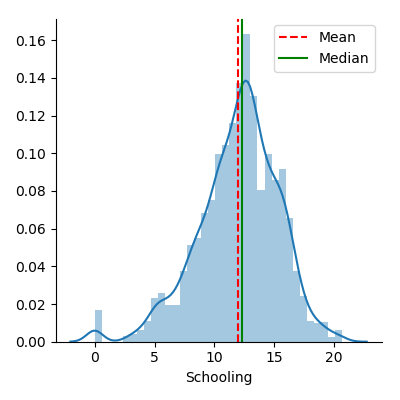

In [276]:
sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'Schooling')
plt.axvline(data['Schooling'].mean(), color = 'r', linestyle = '--')
plt.axvline(data['Schooling'].median(), color = 'g', linestyle = '-')
plt.legend({'Mean':data['Schooling'].mean(), 'Median':data['Schooling'].median()})
plt.show()

In [277]:
# Fetching mean based the groups on the x axis
print('************ mean ***********************')
print('overall mean: ', data['Schooling'].mean())
print('mean (<= 40): ',data['Schooling'].loc[data['Life expectancy '] <= 40].mean())
print('mean (40+ - 50): ',data['Schooling'].loc[(data['Life expectancy '] > 40) & (data['Life expectancy '] <= 50)].mean())
print('mean (50+ - 60): ',data['Schooling'].loc[(data['Life expectancy '] > 50) & (data['Life expectancy '] <= 60)].mean())
print('mean (60+ - 70): ',data['Schooling'].loc[(data['Life expectancy '] > 60) & (data['Life expectancy '] <= 70)].mean())
print('mean (70+ - 80): ',data['Schooling'].loc[(data['Life expectancy '] > 70) & (data['Life expectancy '] <= 80)].mean())
print('mean (> 80): ',data['Schooling'].loc[data['Life expectancy '] > 80].mean())
# Fetching median based the groups on the x axis
print('************ median ***********************')
print('overall median: ', data['Schooling'].median())
print('median (<= 40): ',data['Schooling'].loc[data['Life expectancy '] <= 40].median())
print('median (40+ - 50): ',data['Schooling'].loc[(data['Life expectancy '] > 40) & (data['Life expectancy '] <= 50)].median())
print('median (50+ - 60): ',data['Schooling'].loc[(data['Life expectancy '] > 50) & (data['Life expectancy '] <= 60)].median())
print('median (60+ - 70): ',data['Schooling'].loc[(data['Life expectancy '] > 60) & (data['Life expectancy '] <= 70)].median())
print('median (70+ - 80): ',data['Schooling'].loc[(data['Life expectancy '] > 70) & (data['Life expectancy '] <= 80)].median())
print('median (> 80): ',data['Schooling'].loc[data['Life expectancy '] > 80].median())

************ mean ***********************
overall mean:  11.992792792792786
mean (<= 40):  7.65
mean (40+ - 50):  8.15304347826087
mean (50+ - 60):  8.211807228915664
mean (60+ - 70):  10.541582733812959
mean (70+ - 80):  13.483435114503811
mean (> 80):  16.510504201680675
************ median ***********************
overall median:  12.3
median (<= 40):  7.65
median (40+ - 50):  8.9
median (50+ - 60):  8.5
median (60+ - 70):  10.7
median (70+ - 80):  13.3
median (> 80):  16.1


In [279]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<=40:
            return 7.65
        elif 40<l<=50:
            return 8.15
        elif 50<l<=60:
            return 8.21
        elif 60<l<=70:
            return 10.54
        elif 70<l<=80:
            return 13.48
        elif l>80:
            return 16.51
    else:
        return s

data['Schooling'] = data[['Schooling','Life expectancy ']].apply(impute_schooling, axis=1)

*Now as we have finished filling Nans lets have a look at that null_df which shows no. of Nans.*

In [283]:
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df = pd.DataFrame({'Feature Name':a, 'no. of Nan':b})
null_df

,Feature Name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


**Let us check our Target Variable, also its distribution.**

<IPython.core.display.Javascript object>


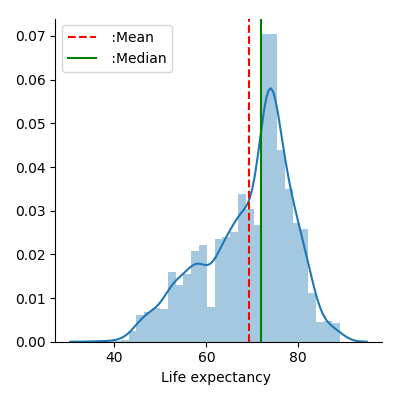

In [286]:
sns.FacetGrid(data, height=4) \
    .map(sns.distplot, 'Life expectancy ')
plt.axvline(data['Life expectancy '].mean(), color='r', linestyle='--')
plt.axvline(data['Life expectancy '].median(), color='g', linestyle='-')
plt.legend({' :Mean':data['Life expectancy '].mean(), ' :Median':data['Life expectancy '].median()})
plt.show()

In [287]:
y = data['Life expectancy ']

In [288]:
X = data.drop('Life expectancy ', axis=1)

In [289]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2938 non-null

**There are 'object' type of features in our Predictor(X) dataset. Lets explore them and try to convert them into numericals.**

In [290]:
X['Country'].head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: Country, dtype: object

In [291]:
# Extracting unique options from Country column
X['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [292]:
# Lets see number of unique values.
X['Country'].nunique()

193

In [293]:
# Lets have look at the other object type feature.
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

*We can create dummy variables for this objects to fit well in the model. Lets build the dummy variables.*

In [294]:
#Dummy variables for Country
Country_dummy = pd.get_dummies(X['Country'])
Country_dummy.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,...,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [295]:
#Dummy variables for status
status_dummy = pd.get_dummies(X['Status'])
status_dummy.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


*Now lets concatenate these 'Dummies' with our X dataset.*

*firstly lets drop those two object features and then concatenate it.*

In [296]:
X.drop(['Country','Status'], inplace=True, axis=1)

In [297]:
X = pd.concat([X, Country_dummy, status_dummy], axis=1)

In [299]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 214 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(195)
memory usage: 995.7 KB


In [300]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,...,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Spliting the data into Train and Test data**

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
# 70% training and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

*Lets solve this problem by using Linear Regression and see what it gives us.*

In [303]:
from sklearn.linear_model import LinearRegression

In [304]:
Linear_model = LinearRegression()

In [305]:
Linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [307]:
# Now lets try to predict using test data
prediction1 = Linear_model.predict(X_test)

In [309]:
prediction1[0:10]

array([53.00359083, 54.39161602, 83.57207015, 63.41827208, 73.59537135,
       72.44848787, 69.22124153, 80.42876234, 60.7302265 , 82.9553768 ])

In [312]:
y_test.head(10)

1201    62.5
1628    53.6
1317    83.3
1392    64.3
1308    73.5
1998    72.7
235     68.2
1329    81.1
958     59.7
2511    81.4
Name: Life expectancy , dtype: float64

*Lets Examine our model using RMSE.*

In [313]:
from sklearn.metrics import mean_squared_error

In [315]:
print(mean_squared_error(y_test,prediction1)**(0.5))

1.9145955800285435


*Now lets have a looks at its R Square Value.*

In [316]:
from sklearn.metrics import r2_score

In [317]:
r2_score(y_test, prediction1)

0.9576426460707559

# Checking the model summary using OLS

In [322]:
import statsmodels.api as sm

In [324]:
X_summary = sm.add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [326]:
test_model = sm.OLS(y_train, X_summary).fit()

In [333]:
#test_model.summary()

In [346]:
#print(Linear_model.intercept_, Linear_model.coef_)

# Calculating VIF (Variance Inflation Factor)

In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['Features'] = X_train.columns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [345]:
vif
#vif.round(1)

,VIF Factor,Features
0,2.080824e+00,Year
1,2.669960e+00,Adult Mortality
2,1.548279e+03,infant deaths
3,7.868946e+00,Alcohol
4,8.892586e+00,percentage expenditure
5,2.200606e+00,Hepatitis B
6,2.212840e+00,Measles
7,2.877349e+00,BMI
8,1.491961e+03,under-five deaths
9,2.379402e+00,Polio
